# Weighted Nonlinear Fit
*March 18, 2021*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [4]:
df = pd.read_csv('gravity data.dat', sep='\t')
df.columns =['time', 'num']
print(df)

            time  num
0       5.699515   73
1      11.352059   73
2      16.982616   73
3      22.610175   73
4      28.239733   73
..           ...  ...
665  4449.421775   37
666  4455.086305   37
667  4460.715857   37
668  4477.569040   37
669  4483.200924   37

[670 rows x 2 columns]


- Calculate the position in mm.

In [5]:
position = df['num']*5 # mm
df['position'] = position
df

,time,num,position
0,5.699515,73,365
1,11.352059,73,365
2,16.982616,73,365
3,22.610175,73,365
4,28.239733,73,365
...,...,...,...
665,4449.421775,37,185
666,4455.086305,37,185
667,4460.715857,37,185
668,4477.569040,37,185


- Plot the data.

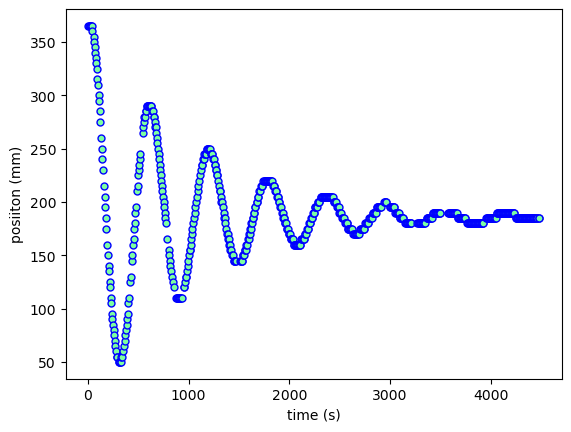

In [6]:
plt.plot(df['time'], df['position'], 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = (.49, 1, .63))
plt.xlabel('time (s)')
plt.ylabel('posiiton (mm)');

To do the actual fit, we will use the *curve_fit()* function from the *SciPy* module.  This way of fitting is very nice because we use it for all types of fit models (linear, polynomial, linear-in-parameter fits, and nonlinear fits).  It is capable of doing both unweighted and weighted fits and it will return uncertainties in the fit parameters via the covariance matrix.

The first step is to define a function for the model that we will fit our data to.

In [7]:
def FitFunc(x, A, tau, w0, S, theta):
    y = S + A*np.exp(-x/tau)*np.cos(w0*x + theta)
    return y

Here is the actual command to execute the fit.  At a minimum, *curve_fit()* requires as inputs the function that defines the model, the *x*-data, and the *y*-data.  The statement below tells *curve_fit()* to return a list of the best-fit parameters and the covariance matrix which will be used to determine the error in the fit parameters.

To give the fit a chance at being successful, we have to provide reasonable initial guesses for the fit parameters.  We use the option "p0" for the list of starting parameters.  The order must be the same as the order of the parameters defined in the function "LRCFunc()".

In [8]:
start = (150, 2000, 2*np.pi/200, 180, -np.pi/2)
a_fit, cov = curve_fit(FitFunc, df['time'], df['position'], p0 = start)

- Here is the output of the *curve_fit()* function.

In [9]:
print('The best-fit parameters are:\n A =', a_fit[0], '\n',\
      'tau =', a_fit[1], 's\n',\
      'w0 =', a_fit[2], '1/s\n',\
      'S =', a_fit[3], 'mm\n',\
      'theta =', a_fit[4], 'rad')

The best-fit parameters are:
 A = 183.881522959208 
 tau = 1073.9392643365218 s
 w0 = 0.010705007388347593 1/s
 S = 186.81878797876453 mm
 theta = -0.3217497189357442 rad


The uncertainties of the best-fit parameters are determined from the square roots of the diagonal elements of the covariance matrix.  

In [13]:
print('The errors in the parameters are:\n \u0394A =', np.sqrt(np.diag(cov))[0],\
      '\n', '\u0394tau =', np.sqrt(np.diag(cov))[1], 's'\
      '\n', '\u0394w0 =', np.sqrt(np.diag(cov))[2], '1/s'\
      '\n', '\u0394S =', np.sqrt(np.diag(cov))[3], 'mm'\
      '\n', '\u0394theta =', np.sqrt(np.diag(cov))[4], 'rad'\
      '\n', 'Overparam\'d?', np.linalg.cond(cov), np.diag(cov)
     )

The errors in the parameters are:
 ΔA = 0.3261655651000663 
 Δtau = 2.839370799250327 s
 Δw0 = 2.6017027683478492e-06 1/s
 ΔS = 0.06110133178814879 mm
 Δtheta = 0.002026388250095992 rad
 Overparam'd? 2582236197987.7544 [1.06383976e-01 8.06202654e+00 6.76885729e-12 3.73337275e-03
 4.10624934e-06]


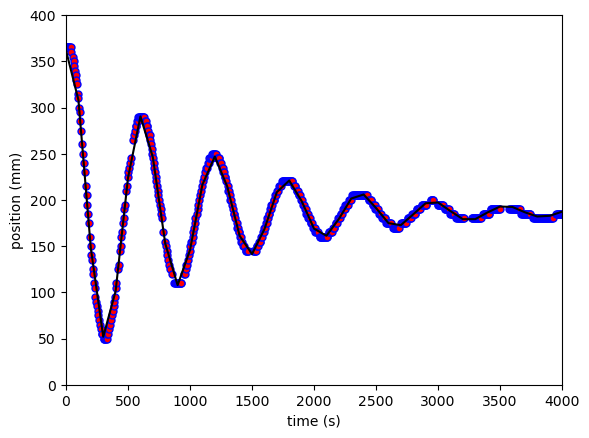

In [12]:
# Here's the data.
plt.plot(df['time'], df['position'], 'ko', markersize = 5,\
                 linewidth = 1.8,\
                 markeredgecolor = 'b',\
                 markerfacecolor = 'r')
plt.xlabel('time (s)')
plt.ylabel('position (mm)')

# Plot the best-fit line.
xx = np.arange(1, 8e5, 100)
plt.plot(xx, FitFunc(xx, a_fit[0], a_fit[1], a_fit[2], a_fit[3], a_fit[4]), 'k-')
plt.axis((0, 4000, 0, 400));